<font size='4'><b>Problem statement:</b> Forecast the sales for Shampoo dataset using ARIMA. Compare the performance between the Baseline model, ARIMA model and fine-tuned ARIMA model. Establish a conclusion.</font>

<br/><br/>

In [1]:
# Importing libraries.
import wget
import numpy as np
import pandas as pd

from pandas import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-1-7a56874d1672>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_name  = "Shampoo.csv"
zenodo_url = "https://zenodo.org/record/4099717/files/"

In [5]:
# Downloading the file Shampoo.csv from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/Shampoo.csv'

In [11]:
# Loading the downloaded file into dataframe.
sr = pd.read_csv("./Assets/Shampoo.csv",index_col=[0], parse_dates=True,squeeze=True)

In [12]:
# A bird's eye view of the series.
sr.head(3)

Month
1-01    266.0
1-02    145.9
1-03    183.1
Name: Sales of shampoo over a three year period, dtype: float64

In [13]:
type(sr)

pandas.core.series.Series

In [14]:
sr.tail(3)

Month
3-11                                         581.3
3-12                                         646.9
Sales of shampoo over a three year period      NaN
Name: Sales of shampoo over a three year period, dtype: float64

In [6]:
# Removing the NaN in the last row
sr.dropna(inplace=True)

In [7]:
sr.tail(3)

Month
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales of shampoo over a three year period, dtype: float64

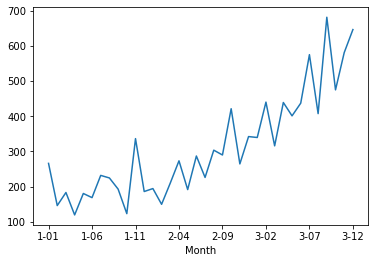

In [8]:
sr.plot()

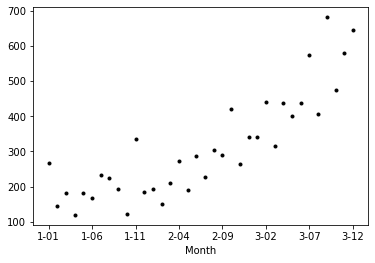

In [9]:
sr.plot(style='k.')

In [41]:
sr.shape

(37,)

In [42]:
sr.size

37

In [10]:
sr.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [12]:
sr_ma=sr.rolling(window=10).mean()

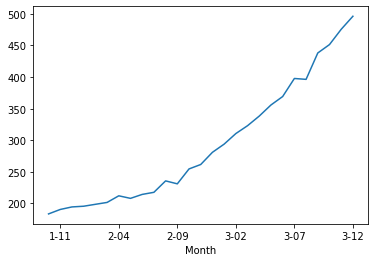

In [13]:
sr_ma.plot()

#### Creating a baseline model.

In [ ]:
shampoo_base=pd.concat([sr, sr.shift(1)],axis=1)

In [15]:
shampoo_base

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [16]:
shampoo_base.columns=['Actual_sales','Forecast_sales']

In [17]:
shampoo_base.dropna(inplace=True)

#### Calculate error for the baseline

In [18]:
shampoo_error=mean_squared_error(shampoo_base.Actual_sales,shampoo_base.Forecast_sales)

In [19]:
shampoo_error

11715.388285714285

In [20]:
np.sqrt(shampoo_error)

108.23764726616282

#### Finding the values of p and q.

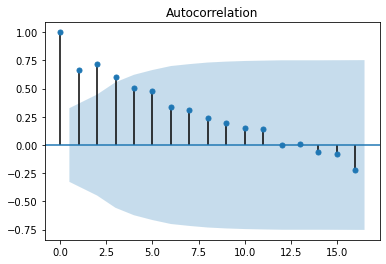

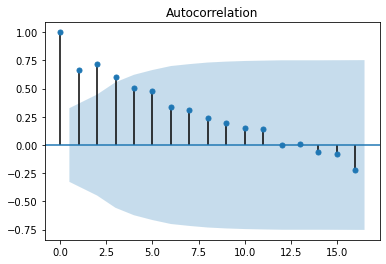

In [22]:
plot_acf(sr)

#### Here, graph shows that after third value correlation goes beyond critical range. So take q as 3.

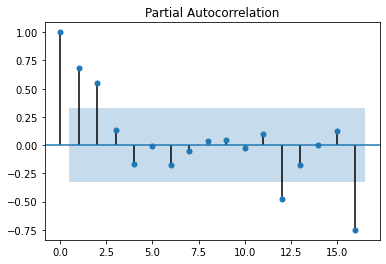

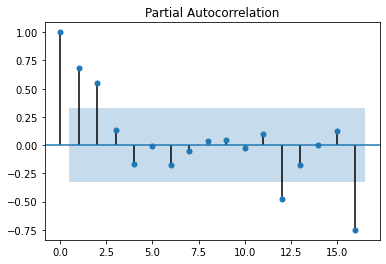

In [23]:
plot_pacf(sr)

In [24]:
srtrain=sr[0:25]
srtest=sr[25:]

In [25]:
shampoo_model=ARIMA(srtrain, order=(3,1,2))

In [26]:
shampoo_model_fit=shampoo_model.fit()

In [27]:
shampoo_model_fit.aic

272.3891948072014

In [28]:
shampoo_forecast=shampoo_model_fit.forecast(steps=11)[0]

#### Evaluation

In [29]:
np.sqrt(mean_squared_error(srtest,shampoo_forecast))

130.92687549685522

#### Note: Here, ARIMA model's accuracy is less than the baseline model. We need to make it better.

In [30]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [34]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            predicted=[]
            train,test=sr[0:25],sr[25:]
            for i in range(len(test)):
                try:
                    model=ARIMA(train, order)
                    model_fit=model.fit(disp=0)
                    y_predict=model_fit.forecast()[0]
                    predicted.append(y_predict)
                    rmse=np.sqrt(mean_squared_error(test, predicted))
                    print("RMSE for order %s is: %.2f"%(order,rmse))
                except:
                    continue
                 
    

RMSE for order (0, 0, 0) is: 279.20
RMSE for order (0, 0, 1) is: 264.80
RMSE for order (0, 0, 2) is: 242.01
RMSE for order (0, 0, 3) is: 249.06
RMSE for order (0, 1, 0) is: 183.98
RMSE for order (0, 1, 1) is: 201.63
RMSE for order (0, 1, 2) is: 185.77
RMSE for order (0, 1, 3) is: 203.63
RMSE for order (0, 1, 4) is: 120.22
RMSE for order (0, 2, 0) is: 184.44
RMSE for order (0, 2, 1) is: 168.50
RMSE for order (0, 2, 2) is: 155.65
RMSE for order (0, 2, 3) is: 151.75
RMSE for order (1, 0, 0) is: 247.30
RMSE for order (1, 0, 1) is: 215.71
RMSE for order (1, 0, 2) is: 209.58
RMSE for order (1, 0, 3) is: 186.70
RMSE for order (1, 1, 0) is: 178.01
RMSE for order (1, 1, 1) is: 205.37
RMSE for order (1, 2, 0) is: 137.28
RMSE for order (1, 2, 1) is: 161.65
RMSE for order (2, 0, 0) is: 212.72
RMSE for order (2, 0, 1) is: 182.90
RMSE for order (2, 1, 0) is: 188.38
RMSE for order (2, 1, 1) is: 199.08
RMSE for order (2, 1, 2) is: 189.43
RMSE for order (2, 2, 0) is: 184.46
RMSE for order (3, 0, 0) is:

#### The optimal values for p,d and q are 3,2 and 3 respectively.

<br/><br/>

<font size='4'><b>Final Thoughts:</b> Since the least RMSE value for our ARIMA model is still more than that of the baseline model, we will reject the ARIMA model.
We have to keep the Baseline model until we get a better model. For that we should apply transformations on the data and 
experiment further with moving average. Utilising RNN variants such as LSTM and GRU invariably lead to a better result.</font>